In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [38]:
nex = pd.read_csv('./Data/NEX_subset_prices.csv', index_col='Date')
nex = nex.fillna(0)

In [39]:
C = nex.shape[1]
W = (nex > 0).astype(int).sum(axis=1) / C

nex = (nex.T * W).T.sum(axis=1)

In [40]:
nex.index = pd.to_datetime(nex.index)

Text(0, 0.5, '%')

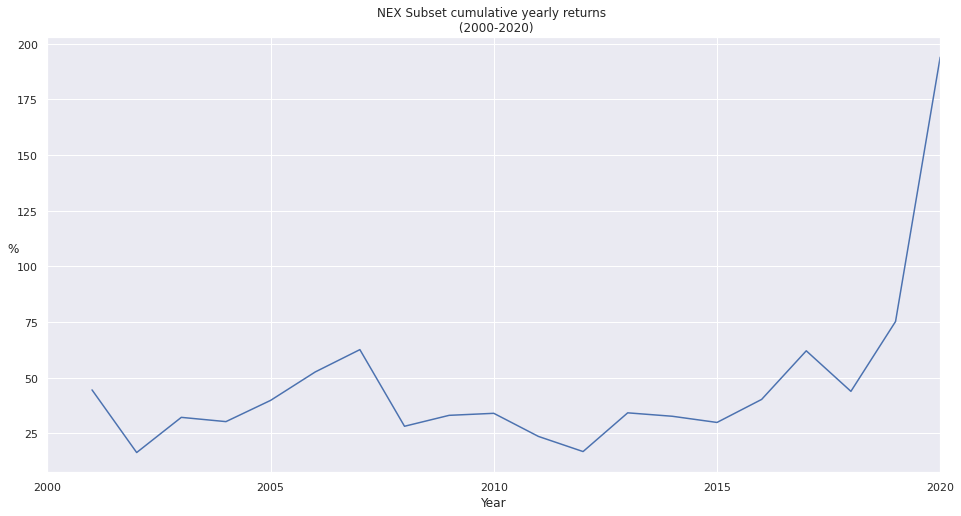

In [61]:
nex_subset_returns = nex.resample('Y').ffill().pct_change()
nex_subset_returns = np.cumprod(1 + nex_subset_returns) * 100

plt.figure(figsize=(16,8))
h = nex_subset_returns.plot()
h.set_title('NEX Subset cumulative yearly returns \n (2000-2020)')
h.set_xlabel('Year')
h.set_ylabel('%', rotation=0)

Text(0, 0.5, '%')

<Figure size 1152x576 with 0 Axes>

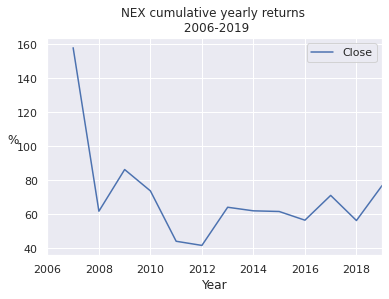

In [58]:
nex_full = pd.read_excel('./Data/NEX_full_prices.xlsx')
nex_full.index = nex_full['Date']
nex_full = nex_full.drop('Date', axis=1)

nex_full_returns = nex_full.resample('Y').ffill().pct_change()
nex_full_returns = np.cumprod(1 + nex_full_returns) * 100

plt.figure(figsize=(16,8))
h = nex_full_returns.plot()
h.set_title('NEX cumulative yearly returns \n 2006-2019')
h.set_xlabel('Year')
h.set_ylabel('%', rotation=0)

In [59]:
nex_full_returns

,Close
Date,
2006-12-31,NaN
2007-12-31,157.909526
2008-12-31,61.746340
2009-12-31,86.269340
2010-12-31,73.704295
2011-12-31,44.078263
2012-12-31,41.636023
2013-12-31,64.084507
2014-12-31,61.978769
